In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
from os import fdopen, remove, walk
import glob
from tempfile import mkstemp
import shutil
from shutil import move, copymode

In [3]:
from datetime import date

In [4]:
DATASET_PATH = "/Users/noopy/covid19_unknown_spread/dataset"

In [5]:
# get oldest file in the dataset folder
import os, heapq
def newst_files_in_tree(rootfolder, count=1, extension=".csv"):
    return heapq.nlargest(count,
        (os.path.join(dirname, filename)
        for dirname, dirnames, filenames in os.walk(rootfolder)
        for filename in filenames
        if filename.endswith(extension)),
        key=lambda fn: os.stat(fn).st_mtime)

In [6]:
newst_csv = newst_files_in_tree(DATASET_PATH)[0]

In [7]:
df_temp = pd.read_csv(newst_csv, encoding="utf-8")
df_temp.sample(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
1646,2943,17525,8.23.,은평구,-,은평구 헤어콕 관련,NaN
39,4550,21810,9.10.,관악구,-,기타 확진자 접촉,NaN
1005,3584,19362,8.28.,송파구,-,타시도 확진자 접촉,NaN
2691,1898,15143,8.15.,성북구,-,성북구 사랑제일교회 관련,퇴원
3804,785,11238,5.26.,성동구,-,이태원 클럽 관련,퇴원
678,3911,20007,8.31.,동대문구,-,동대문구 sk탁구클럽,NaN
2259,2330,16021,8.18.,중구,-,성북구 사랑제일교회 관련,퇴원
400,4189,20822,9.03.,강동구,-,기타 확진자 접촉,NaN
4037,552,10237,4.05.,영등포구,-,확인 중,퇴원
2220,2369,16030,8.19.,강동구,-,강동구 어린이집,퇴원


In [8]:
# overwrite whatever cell value that contains "확인" as "확인 중"
df_temp.loc[df_temp["접촉력"].str.contains("확인"),"접촉력"] = "확인 중"

# check whether those two arrays are combined
df_temp.loc[df_temp["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

In [9]:
df_temp["접촉력"] = df_temp["접촉력"].str.replace("관련", "")
df_temp["접촉력"] = df_temp["접촉력"].str.strip()

In [10]:
infection_paths = df_temp["접촉력"].unique()
print(len(infection_paths))
infection_paths

234


array(['확인 중', '타시도 확진자 접촉', '기타 확진자 접촉', '서대문구 소재 세브란스병원', '해외 접촉 추정',
       '종로구청 근로자', '영등포구 일련정종 서울포교소', '송파구 쿠팡 물류센터', '동작구 진흥글로벌',
       '구로구 아파트', '동작구 요양시설', '강동구 BF모바일 콜센터', '영등포 지인모임', '8.15서울도심집회',
       'KT가좌지사', '도봉구 운동시설', '성북구 사랑제일교회', '노원구 기도모임', '관악구 가족모임',
       '노원구 빛가온교회', '영등포구 국회출입기자', '은평구 수색성당', '광진구 혜민병원', '은평구 헤어콕',
       '송파구 소재병원', '극단 산', '영등포구 권능교회', '서초구 장애인교육시설', '강동구 소재 병원',
       '다래경매', '성북구 체대입시', '성북구 요양시설', '중구소재 은행', '중랑구 소재 체육시설',
       '관악구 에바다', '동작구 소재 서울신학교', '용인시 우리제일교회', '노원구 손해보험', '구로구 보성운수',
       '강서구 서울대효요양병원', '서대문구 지인모임', '강북구 일가족', '강서구 보안회사', '롯데리아 종사자 모임',
       '강남구 소재 아파트', '제주 게스트하우스', '동작구 카드 발급업체', '성북구 벧엘장로교회',
       '관악구 김혜근의원', '8.15도심집회', '동대문구 sk탁구클럽', '동작구 스터디카페', '영등포구 큰권능교회',
       '군인권센터', '여의도 순복음교회', '중구 보험회사(현대해상)', '강서구 병원',
       '8.15도심집회(순복음 강북교회)', '중앙보훈병원', '종로구 혜화경찰서', '양천구 되새김교회', '현대커머셜',
       '8.15도심집회(녹색병원)', '영등포 IFC몰 오케스트로', '고양시 반석교회(케네디상가)', '롯데 자산개발',
       '골드트레인', '한양대병원', '순복음 강북교

In [11]:
df_date = df_temp.sort_values(["연번"], ascending=False)
df_date.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4589,21918,9.10.,기타,-,확인 중,NaN
1,4588,21916,9.10.,기타,-,확인 중,NaN
2,4587,21888,9.10.,타시도,-,타시도 확진자 접촉,NaN
3,4586,21884,9.10.,성동,-,기타 확진자 접촉,NaN
4,4585,21866,9.10.,노원구,-,기타 확진자 접촉,NaN


In [12]:
df_date["확진일"] = df_date["확진일"].str.replace(".", "-")
df_date["확진일"] = df_date["확진일"].str[:-1]
df_date.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4589,21918,9-10,기타,-,확인 중,NaN
1,4588,21916,9-10,기타,-,확인 중,NaN
2,4587,21888,9-10,타시도,-,타시도 확진자 접촉,NaN
3,4586,21884,9-10,성동,-,기타 확진자 접촉,NaN
4,4585,21866,9-10,노원구,-,기타 확진자 접촉,NaN


In [13]:
df_date["확진일"] = "2020-0" + df_date["확진일"]
df_date.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4589,21918,2020-09-10,기타,-,확인 중,NaN
1,4588,21916,2020-09-10,기타,-,확인 중,NaN
2,4587,21888,2020-09-10,타시도,-,타시도 확진자 접촉,NaN
3,4586,21884,2020-09-10,성동,-,기타 확진자 접촉,NaN
4,4585,21866,2020-09-10,노원구,-,기타 확진자 접촉,NaN


In [14]:
df_date.sample(5)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
166,4423,21418,2020-09-07,서대문구,-,영등포구 일련정종 서울포교소,NaN
3951,638,10833,2020-05-08,종로구,-,이태원 클럽,퇴원
927,3662,19462,2020-08-29,동대문구,-,동대문구 sk탁구클럽,NaN
2839,1750,14819,2020-08-13,광진구,-,골드트레인,퇴원
4517,72,3680,2020-02-27,강동구,-,명성교회,퇴원


In [15]:
df = df_date.copy()
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4589,21918,2020-09-10,기타,-,확인 중,NaN
1,4588,21916,2020-09-10,기타,-,확인 중,NaN
2,4587,21888,2020-09-10,타시도,-,타시도 확진자 접촉,NaN
3,4586,21884,2020-09-10,성동,-,기타 확진자 접촉,NaN
4,4585,21866,2020-09-10,노원구,-,기타 확진자 접촉,NaN


In [16]:
df.loc[(df["확진일"].str.len() < 10), '확진일'] = df.loc[(df["확진일"].str.len() < 10), '확진일'].str.replace("-0", "-")
df.loc[(df["확진일"].str.len() < 10), '확진일'] = df.loc[(df["확진일"].str.len() < 10), '확진일'].str.replace("-", "-0")
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4589,21918,2020-09-10,기타,-,확인 중,NaN
1,4588,21916,2020-09-10,기타,-,확인 중,NaN
2,4587,21888,2020-09-10,타시도,-,타시도 확진자 접촉,NaN
3,4586,21884,2020-09-10,성동,-,기타 확진자 접촉,NaN
4,4585,21866,2020-09-10,노원구,-,기타 확진자 접촉,NaN


In [17]:
df.sample(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
3895,694,10929,2020-05-11,양평,-,이태원 클럽,퇴원
4491,98,4645,2020-03-02,서초구,-,확인 중,퇴원
2216,2373,16041,2020-08-19,성북구,-,성북구 체대입시,퇴원
1691,2898,17431,2020-08-23,용산구,-,확인 중,NaN
567,4022,20328,2020-08-31,성북구,-,성북구 사랑제일교회,NaN
2370,2219,15982,2020-08-18,은평구,-,기타 확진자 접촉,퇴원
3874,715,11005,2020-05-14,동대문구,-,이태원 클럽,퇴원
349,4240,20904,2020-09-04,기타,-,확인 중,NaN
4280,309,8664,2020-03-20,강동구,필리핀,해외 접촉 추정,퇴원
2362,2227,15883,2020-08-18,관악구,-,성북구 사랑제일교회,퇴원


In [18]:
df.to_csv("./dataset_predict/df_wrangle.csv", index=False)

In [19]:
temp = df["확진일"].value_counts().rename_axis('date').reset_index(name='new_confirmed')
temp.head()

,date,new_confirmed
0,2020-08-29,167
1,2020-08-27,160
2,2020-08-26,157
3,2020-08-18,151
4,2020-08-15,146


In [20]:
df_predict = temp.sort_values(by="date")
df_predict.head()

,date,new_confirmed
189,2020-01-24,1
172,2020-01-30,3
171,2020-01-31,3
188,2020-02-02,1
180,2020-02-05,2


### stretch the dataframe as timeseries dataset with interval of 1 day 

In [21]:
df_predict["date"] = pd.to_datetime(df_predict["date"])

In [22]:
df_predict.index = pd.DatetimeIndex(df_predict["date"])
df_predict.head()

,date,new_confirmed
date,,
2020-01-24,2020-01-24,1
2020-01-30,2020-01-30,3
2020-01-31,2020-01-31,3
2020-02-02,2020-02-02,1
2020-02-05,2020-02-05,2


In [23]:
df_predict = df_predict.resample('D').max()
df_predict.head()

,date,new_confirmed
date,,
2020-01-24,2020-01-24,1.0
2020-01-25,NaT,NaN
2020-01-26,NaT,NaN
2020-01-27,NaT,NaN
2020-01-28,NaT,NaN


In [24]:
df_predict["date"] = df_predict.index
df_predict.head()

,date,new_confirmed
date,,
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,NaN
2020-01-26,2020-01-26,NaN
2020-01-27,2020-01-27,NaN
2020-01-28,2020-01-28,NaN


In [25]:
df_predict = df_predict.fillna(0)
df_predict[:10]

,date,new_confirmed
date,,
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,0.0
2020-01-26,2020-01-26,0.0
2020-01-27,2020-01-27,0.0
2020-01-28,2020-01-28,0.0
2020-01-29,2020-01-29,0.0
2020-01-30,2020-01-30,3.0
2020-01-31,2020-01-31,3.0
2020-02-01,2020-02-01,0.0


In [26]:
df_predict.to_csv("dataset_predict/df_predict.csv", index=False)

In [27]:
df_predict =  pd.read_csv("dataset_predict/df_predict.csv", encoding="utf-8")

### get untracked patients information

In [28]:
df_untracked = df[df["접촉력"]=="확인 중"]
df_untracked

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4589,21918,2020-09-10,기타,-,확인 중,NaN
1,4588,21916,2020-09-10,기타,-,확인 중,NaN
5,4584,21871,2020-09-10,관악구,-,확인 중,NaN
14,4575,21867,2020-09-10,서초구,-,확인 중,NaN
21,4568,21859,2020-09-10,송파구,-,확인 중,NaN
...,...,...,...,...,...,...,...
4533,56,1768,2020-02-25,고양시,-,확인 중,퇴원
4547,42,1370,2020-02-25,노원구,-,확인 중,퇴원
4550,39,924,2020-02-25,평택,-,확인 중,퇴원
4551,38,907,2020-02-25,관악구,-,확인 중,퇴원


In [29]:
df_untracked_temp = df_untracked.groupby(by=["확진일"]).size()
df_untracked_temp = df_untracked_temp.rename_axis('date').reset_index(name='new_untracked')
df_untracked_temp

,date,new_untracked
0,2020-02-25,6
1,2020-02-26,1
2,2020-02-27,2
3,2020-02-28,2
4,2020-03-02,2
...,...,...
125,2020-09-06,13
126,2020-09-07,19
127,2020-09-08,11
128,2020-09-09,9


In [30]:
df_untracked_no = df_untracked_temp

In [31]:
df_merged = pd.merge(df_predict, df_untracked_no, how="left", on="date")
df_merged = df_merged.fillna(0)
df_merged.head(15)

,date,new_confirmed,new_untracked
0,2020-01-24,1.0,0.0
1,2020-01-25,0.0,0.0
2,2020-01-26,0.0,0.0
3,2020-01-27,0.0,0.0
4,2020-01-28,0.0,0.0
5,2020-01-29,0.0,0.0
6,2020-01-30,3.0,0.0
7,2020-01-31,3.0,0.0
8,2020-02-01,0.0,0.0
9,2020-02-02,1.0,0.0


In [32]:
df_merged.tail(15)

,date,new_confirmed,new_untracked
216,2020-08-27,160.0,38.0
217,2020-08-28,118.0,34.0
218,2020-08-29,167.0,23.0
219,2020-08-30,70.0,17.0
220,2020-08-31,104.0,18.0
221,2020-09-01,87.0,20.0
222,2020-09-02,64.0,12.0
223,2020-09-03,46.0,6.0
224,2020-09-04,55.0,6.0
225,2020-09-05,58.0,19.0


In [49]:
list_infection_paths_no = []
for index, row in df_merged.iterrows():
    filter_end_date = row["date"]
    # print(filter_end_date)
    df_filtered = df.loc[df['확진일'] <= filter_end_date]
    
    # 확진자 접촉력이 밝혀진 경우
    infection_paths_known_no = len(df_filtered["접촉력"].unique())
    
    # "기타 확진자 접촉", "타시도 확진자 접촉" 항목 485건 / R0
    etc_contact_no = len(df_filtered[df_filtered["접촉력"].str.contains("기타 확진자 접촉")])/1.5
    state_contact_no = len(df_filtered[df_filtered["접촉력"].str.contains("타시도 확진자 접촉")])/1.5

    infection_paths_no = infection_paths_known_no + etc_contact_no + state_contact_no
    list_infection_paths_no.append(int(infection_paths_no))
print(list_infection_paths_no[:10])
print(list_infection_paths_no[-10:])

[1, 1, 1, 1, 1, 1, 2, 4, 4, 4]
[614, 632, 643, 662, 674, 684, 704, 713, 724, 740]


In [50]:
df_merged["no_paths"] = list_infection_paths_no
df_merged["new_confirmed"] = df_merged["new_confirmed"].apply(int)
df_merged["new_untracked"] = df_merged["new_untracked"].apply(int)
df_merged.head()

,date,new_confirmed,new_untracked,no_paths
0,2020-01-24,1,0,1
1,2020-01-25,0,0,1
2,2020-01-26,0,0,1
3,2020-01-27,0,0,1
4,2020-01-28,0,0,1


In [51]:
df_merged.tail()

,date,new_confirmed,new_untracked,no_paths
226,2020-09-06,44,13,684
227,2020-09-07,76,19,704
228,2020-09-08,30,11,713
229,2020-09-09,47,9,724
230,2020-09-10,63,12,740


In [52]:
df_merged.to_csv("dataset_predict/df_predict.csv", index=False)

### Label holiday as column

In [53]:
import json

list_calendar=[]

calendar_file = "./korean-calendar/korean-calendar.json"
# read file
with open(calendar_file, 'r') as myfile:
    data=myfile.readlines()

data = [x.strip() for x in data] 

for i in data:
    calendar_data = i[43:]
    calendar_item = "{"+calendar_data
    calendar_item_json = json.loads(calendar_item)
    list_calendar.append(calendar_item_json)
list_calendar[:10]

[{'sc': '2000-01-01', 'lc': '1999-11-25', 'w': 7, 'h': True, 'ht': '신정'},
 {'sc': '2000-01-02', 'lc': '1999-11-26', 'w': 1, 'h': False, 'ht': ''},
 {'sc': '2000-01-03', 'lc': '1999-11-27', 'w': 2, 'h': False, 'ht': ''},
 {'sc': '2000-01-04', 'lc': '1999-11-28', 'w': 3, 'h': False, 'ht': ''},
 {'sc': '2000-01-05', 'lc': '1999-11-29', 'w': 4, 'h': False, 'ht': ''},
 {'sc': '2000-01-06', 'lc': '1999-11-30', 'w': 5, 'h': False, 'ht': ''},
 {'sc': '2000-01-07', 'lc': '1999-12-01', 'w': 6, 'h': False, 'ht': ''},
 {'sc': '2000-01-08', 'lc': '1999-12-02', 'w': 7, 'h': False, 'ht': ''},
 {'sc': '2000-01-09', 'lc': '1999-12-03', 'w': 1, 'h': False, 'ht': ''},
 {'sc': '2000-01-10', 'lc': '1999-12-04', 'w': 2, 'h': False, 'ht': ''}]

In [54]:
df_calendar = pd.DataFrame(list_calendar)
df_calendar = df_calendar[["sc", "w", "h"]]
df_calendar.head()

,sc,w,h
0,2000-01-01,7,True
1,2000-01-02,1,False
2,2000-01-03,2,False
3,2000-01-04,3,False
4,2000-01-05,4,False


In [55]:
# notate sunday, friday, saturday as weekend: which is 1
def label_weekend(row):
    # sunday
    if row['w'] == 1:
        return 1
    # friday
    if row['w'] == 6:
        return 1
    # saturday
    if row['w'] == 7:
        return 1
    else:
        return 0

In [56]:
df_calendar["is_weekend"] = df_calendar.apply(lambda row: label_weekend(row), axis=1)
df_calendar.head(10)

,sc,w,h,is_weekend
0,2000-01-01,7,True,1
1,2000-01-02,1,False,1
2,2000-01-03,2,False,0
3,2000-01-04,3,False,0
4,2000-01-05,4,False,0
5,2000-01-06,5,False,0
6,2000-01-07,6,False,1
7,2000-01-08,7,False,1
8,2000-01-09,1,False,1
9,2000-01-10,2,False,0


In [57]:
# rename dataframe name
df_calendar.rename(columns = {'sc':'date', 'h':'is_holiday'}, inplace = True)

In [58]:
# if it is holiday, notate as 1. If not, notate as 0
df_calendar.loc[df_calendar["is_holiday"]==True, "is_holiday"] = 1
df_calendar.loc[df_calendar["is_holiday"]==False, "is_holiday"] = 0
df_calendar[:10]

,date,w,is_holiday,is_weekend
0,2000-01-01,7,1,1
1,2000-01-02,1,0,1
2,2000-01-03,2,0,0
3,2000-01-04,3,0,0
4,2000-01-05,4,0,0
5,2000-01-06,5,0,0
6,2000-01-07,6,0,1
7,2000-01-08,7,0,1
8,2000-01-09,1,0,1
9,2000-01-10,2,0,0


In [59]:
df_calendar.to_csv("dataset_predict/df_calendar.csv", index=False)

In [60]:
df_calendar_subset = df_calendar[["date", "is_holiday", "is_weekend"]]

In [61]:
df_train = pd.merge(df_merged, df_calendar_subset, how="left", on="date")
df_train.tail()

,date,new_confirmed,new_untracked,no_paths,is_holiday,is_weekend
226,2020-09-06,44,13,684,0,1
227,2020-09-07,76,19,704,0,0
228,2020-09-08,30,11,713,0,0
229,2020-09-09,47,9,724,0,0
230,2020-09-10,63,12,740,0,0


### Add Government Social Distancing Policy

In [62]:
df_train["gov_policy"] = 0
df_train[-10:]

,date,new_confirmed,new_untracked,no_paths,is_holiday,is_weekend,gov_policy
221,2020-09-01,87,20,614,0,0,0
222,2020-09-02,64,12,632,0,0,0
223,2020-09-03,46,6,643,0,0,0
224,2020-09-04,55,6,662,0,1,0
225,2020-09-05,58,19,674,0,1,0
226,2020-09-06,44,13,684,0,1,0
227,2020-09-07,76,19,704,0,0,0
228,2020-09-08,30,11,713,0,0,0
229,2020-09-09,47,9,724,0,0,0
230,2020-09-10,63,12,740,0,0,0


In [77]:
# 서울의 사회적 거리두기 2단계는 8월 16일부터 조치됨
# 서울에는 8월 19일 0시 기준으로 새로운 조치들이 추가되며, 흔히 얘기하는 2.5단계가 됨. 이후에 기간 연장을 해서 9.7(월)0시 ~ 9.13(일)24시까지 2.5단계가 시행됨

df_train.loc[(df_train["date"]>="2020-08-16") & (df_train["date"]<="2020-08-18"),"gov_policy"] = 2
df_train.loc[(df_train["date"]>="2020-08-19") & (df_train["date"]<="2020-09-13"),"gov_policy"] = 3

# 서울시 사랑제일교회 광복절 집회 이후 16일 간의 데이터
after_jkh = df_train[(df_train["date"]>="2020-08-14") & (df_train["date"]<="2020-08-27")]
after_jkh

,date,new_confirmed,new_untracked,no_paths,is_holiday,is_weekend,gov_policy
203,2020-08-14,73,4,214,0,1,0
204,2020-08-15,146,6,221,1,1,0
205,2020-08-16,91,4,228,0,1,2
206,2020-08-17,132,7,233,0,0,2
207,2020-08-18,151,18,239,0,0,2
208,2020-08-19,135,19,259,0,0,3
209,2020-08-20,126,28,280,0,0,3
210,2020-08-21,128,32,304,0,1,3
211,2020-08-22,143,44,332,0,1,3
212,2020-08-23,98,25,358,0,1,3


In [78]:
recent_two_weeks_data = df_train.tail(14)
recent_two_weeks_data

,date,new_confirmed,new_untracked,no_paths,is_holiday,is_weekend,gov_policy
217,2020-08-28,118,34,521,0,1,3
218,2020-08-29,167,23,555,0,1,3
219,2020-08-30,70,17,573,0,1,3
220,2020-08-31,104,18,597,0,0,3
221,2020-09-01,87,20,614,0,0,3
222,2020-09-02,64,12,632,0,0,3
223,2020-09-03,46,6,643,0,0,3
224,2020-09-04,55,6,662,0,1,3
225,2020-09-05,58,19,674,0,1,3
226,2020-09-06,44,13,684,0,1,3


In [64]:
df_train.to_csv("./dataset_predict/df_train.csv", index=False)

<AxesSubplot:>

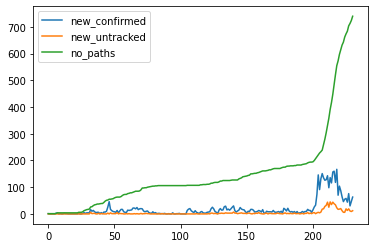

In [85]:
df_train[["new_confirmed", "new_untracked", "no_paths"]].plot()

<AxesSubplot:>

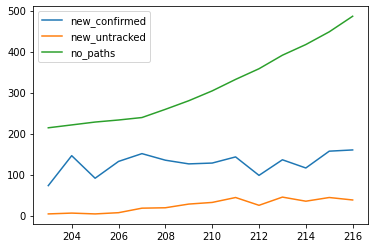

In [87]:
after_jkh[["new_confirmed", "new_untracked", "no_paths"]].plot()

<AxesSubplot:>

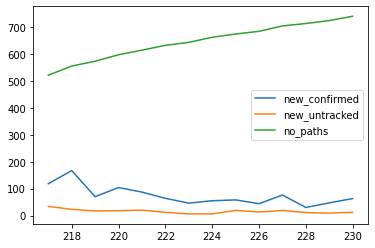

In [86]:
recent_two_weeks_data[["new_confirmed", "new_untracked", "no_paths"]].plot()